## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
data_energy = pd.read_csv("../../data/energy_dataset.csv")
data_weather = pd.read_csv("../../data/weather_features.csv")

In [5]:
# Import data
df = pd.concat(
    map(pd.read_csv, ['../../data/energy_dataset.csv', '../../data/weather_features.csv']), ignore_index=True)

data1 = pd.read_csv('../../data/energy_dataset.csv')
data2 = pd.read_csv('../../data/weather_features.csv')
#data2 = data2.barloc[data2["city_name"]=='Valencia']


# using merge function by setting how='inner'
df = pd.merge(data1, data2,left_on="time",right_on="dt_iso")
for i in range(len(df)):
    if(df.iloc[i]["time"] != df.iloc[i]["dt_iso"]):
        df.drop(i,axis=0,inplace=True)
        i-=1

df=df.drop(columns=["temp_max","temp_min"])
cList = []
for col1 in data2.columns:
    for col2 in data1.columns:
        if col1 != col2 and col1 in df and col2 in df:
            cf=df[[col1,col2]].corr()
            if col1 in cf and col2 in cf:
                num = cf[col2].iloc[0]
                if np.isnan(num)==False and num<1:
                    cList.append((num,col1,col2))

In [8]:
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,dt_iso,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Valencia,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Madrid,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Bilbao,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Barcelona,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Seville,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 23:00:00+01:00,Valencia,279.140000,1029,75,2,300,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 23:00:00+01:00,Madrid,275.150000,1031,74,1,360,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 23:00:00+01:00,Bilbao,275.600000,1034,93,2,100,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 23:00:00+01:00,Barcelona,280.130000,1028,100,5,310,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### Location

- We can't really rely on the weather data, but we can show that the different cities have different trends

### Examine Unique Values

In [5]:
df2 = df.drop_duplicates()

In [6]:
df_valencia = df2.loc[df.city_name == 'Valencia']
df_madrid = df2.loc[df.city_name == 'Madrid']
df_bilbao = df2.loc[df.city_name == 'Bilbao']
df_barcelona = df2.loc[df.city_name == ' Barcelona']
df_seville = df2.loc[df.city_name == 'Seville']

In [7]:
for col in df2.columns:
    if col != 'time':
        print(f"col: {col} ||| unqiue_vals: {len(df2[col].unique())} / {df2.shape[0]} instances")

col: generation biomass ||| unqiue_vals: 424 / 178375 instances
col: generation fossil brown coal/lignite ||| unqiue_vals: 957 / 178375 instances
col: generation fossil coal-derived gas ||| unqiue_vals: 2 / 178375 instances
col: generation fossil gas ||| unqiue_vals: 8298 / 178375 instances
col: generation fossil hard coal ||| unqiue_vals: 7267 / 178375 instances
col: generation fossil oil ||| unqiue_vals: 322 / 178375 instances
col: generation fossil oil shale ||| unqiue_vals: 2 / 178375 instances
col: generation fossil peat ||| unqiue_vals: 2 / 178375 instances
col: generation geothermal ||| unqiue_vals: 2 / 178375 instances
col: generation hydro pumped storage aggregated ||| unqiue_vals: 1 / 178375 instances
col: generation hydro pumped storage consumption ||| unqiue_vals: 3312 / 178375 instances
col: generation hydro run-of-river and poundage ||| unqiue_vals: 1685 / 178375 instances
col: generation hydro water reservoir ||| unqiue_vals: 7030 / 178375 instances
col: generation marin

In [44]:
print(df_valencia['generation solar'].mean())
print(df_madrid['generation solar'].mean())
print(df_bilbao['generation solar'].mean())
print(df_barcelona['generation solar'].dropna().mean())
print(df_seville['generation solar'].mean())

1431.27264962132
1428.4797627258931
1429.1295054134544
1429.3335871833926
1424.7824679893063


### PCA To Identify How Features Can Be Used That Distinguish Datapoints well from others

In [5]:
df_use = df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'])

In [6]:
df_use = df_use.dropna() # drop entries with null values for now.

In [62]:
# Drop categorical features for now to use in the PCA (we could OHE, but I decided not to for now)
df_use_pca = df_use.drop(columns=['weather_id', 'weather_main', 'weather_description', 'weather_icon'])

In [63]:
# Drop datapoints with only 1 unique value ==> not information rich (everyone has this value)
df_use_pca = df_use_pca.drop(columns=['time', 'dt_iso', 'city_name', 'generation fossil coal-derived gas',
                                     'generation fossil oil shale', 'generation fossil peat',
                                     'generation geothermal', 'generation marine', 'generation wind offshore'])

In [64]:
df_use_pca.nunique()

generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil gas                           8293
generation fossil hard coal                     7265
generation fossil oil                            321
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                                5331
generation waste                                 262
generation wind onshore                        11462
forecast solar day ahead                        5356
forecast wind onshore day ahead                11329
total load forecast                            14786
total load actual                              15123
price day ahead                               

In [65]:
# Drop any columns you don't want in the PCA
df_use_pca = df_use_pca.drop(columns=['generation other renewable', 'rain_1h', 'rain_3h', 'generation other'])

### Corr Map Before PCA

<AxesSubplot:>

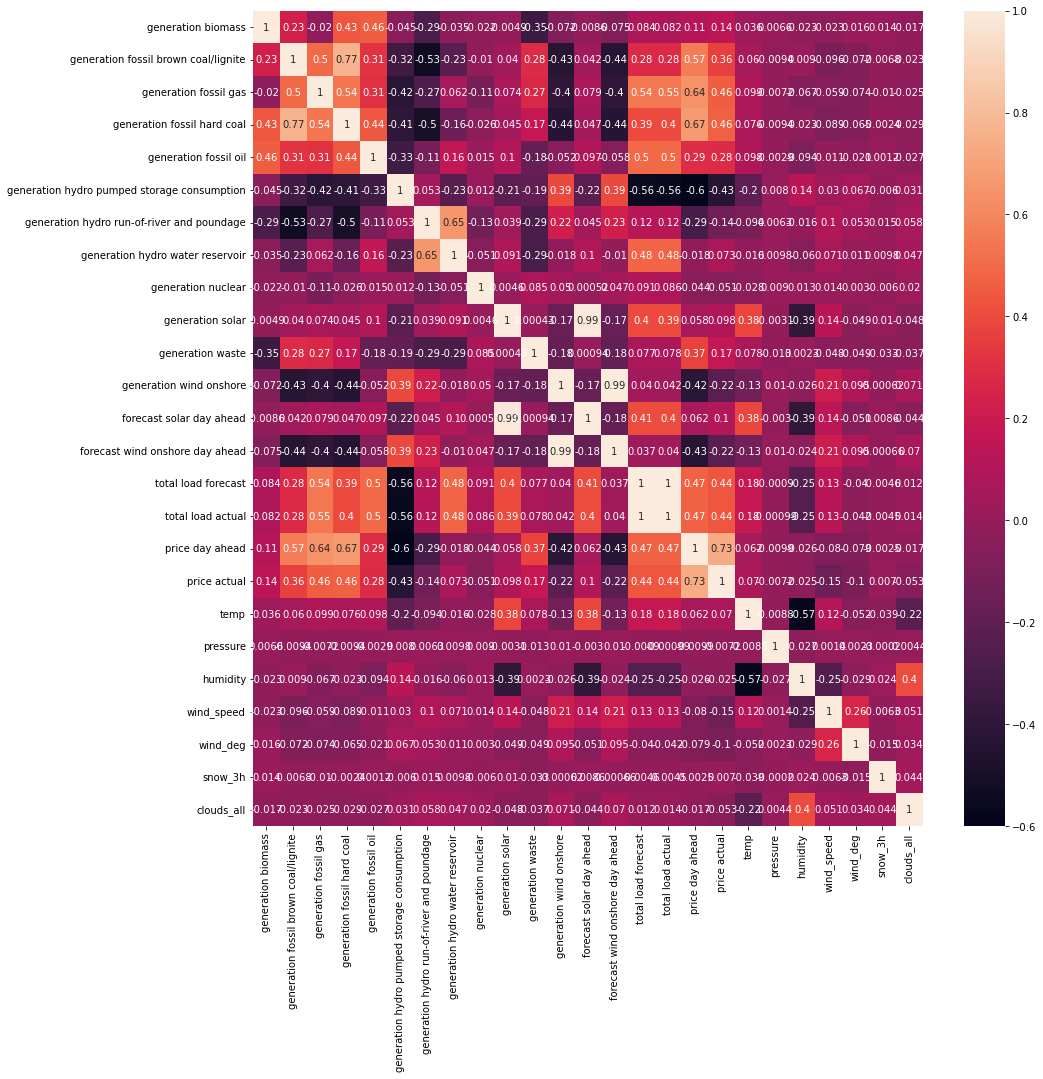

In [72]:
plt.figure(figsize=(15,15))
sns.heatmap(df_use_pca.corr(), annot=True, fmt='.2g')

### Run the PCA

- Inital PCA doesn't reveal distinct groups. (Perhaps clustering techniques may be able to reveal this)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [55]:
df_use_pca = StandardScaler().fit_transform(df_use_pca)

In [56]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_use_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

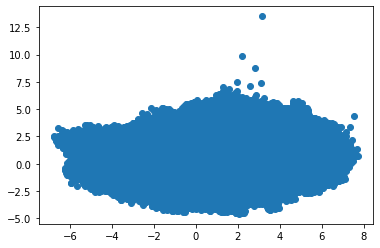

In [59]:
# The pca looks a bit like a blob... no distinct groups are emerging
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

### Examining For Seasonality

- May be able to extract features / use ARIMA - like models
- There does seem to be seasonality in some of the features (i.e. generation solar, it makes sense that this would be higher in warmer months)

<AxesSubplot:xlabel='time'>

<Figure size 2160x720 with 0 Axes>

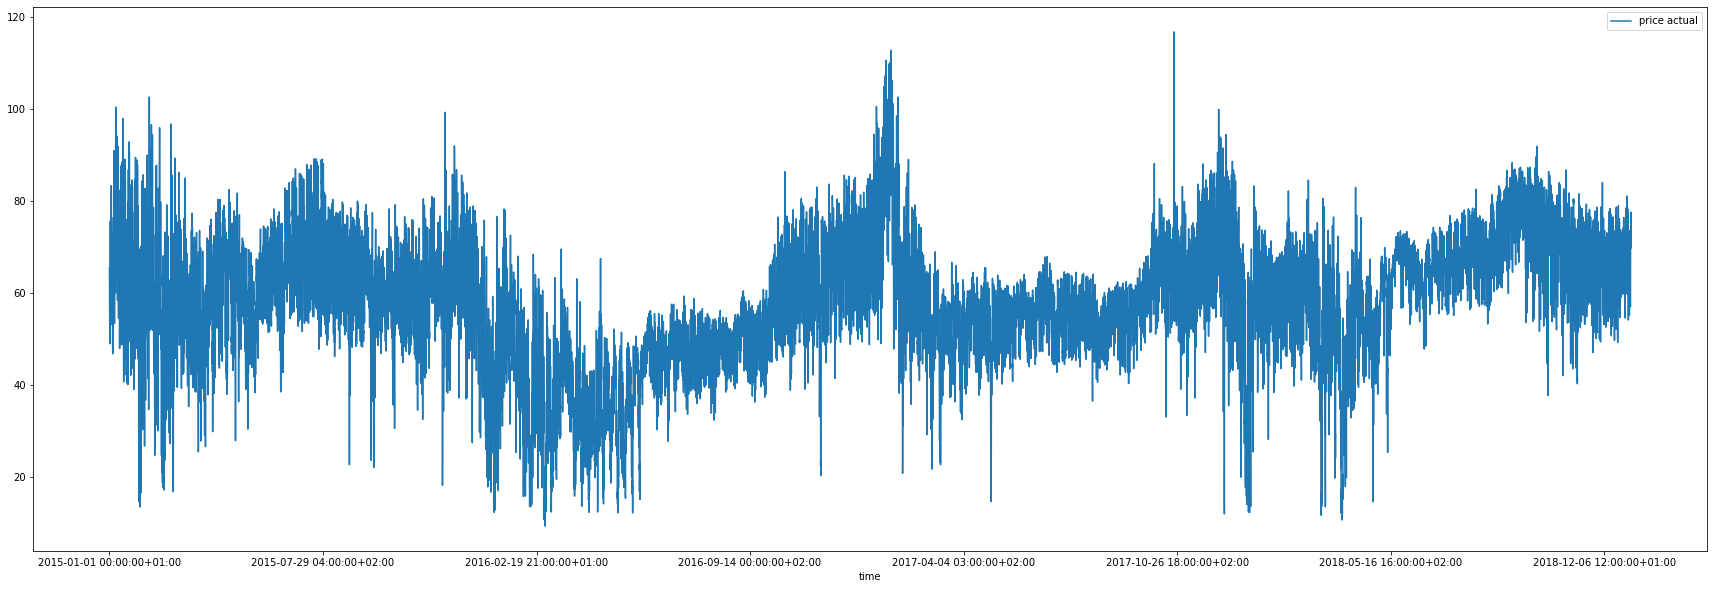

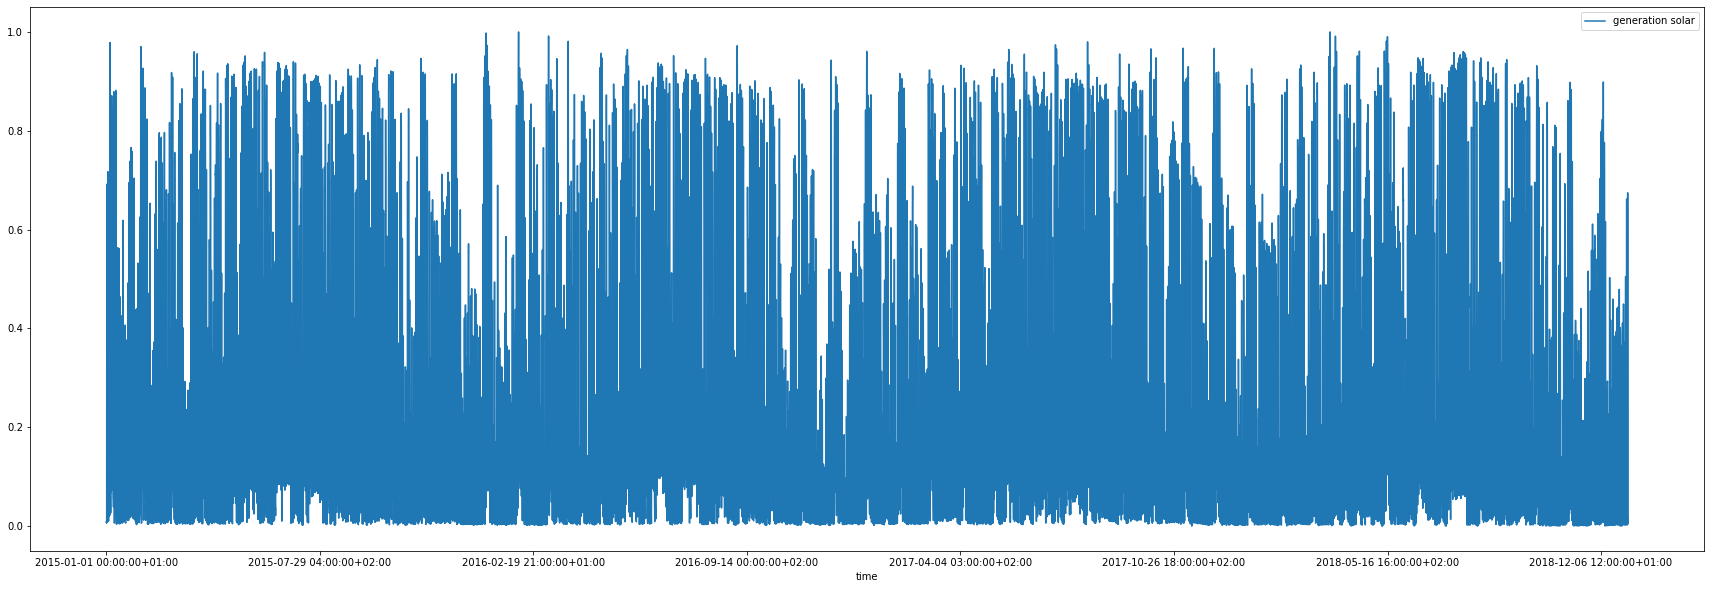

In [83]:
plt.figure(figsize=(30,10))
df_use.plot(x='time', y='price actual', figsize=(30,10))
df_use['generation solar'] = (df_use['generation solar'] - df_use['generation solar'].min()) / (df_use['generation solar'].max() - df_use['generation solar'].min())
df_use.plot(x='time', y='generation solar', figsize=(30,10))

## Train a Toy DNN

- Not sure what's going on with the NaN loss (this can happen in DNNs used for regression)
    - I checked to make sure the data values were scaled and to clip the norms, but this doesn't seem to work
    - We may also want to scale the training and testing separately, as this could introduce some information about the testing set into the training set, which is not something that is ideal

In [118]:
import keras
import tensorflow as tf

In [119]:
df_use_dnn = df.drop(columns=['weather_icon', 'weather_id', 'weather_description', 'weather_icon', 'time', 'dt_iso', 'city_name', 'price day ahead',
                                 'generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 
                                  'generation marine', 'generation wind offshore', 'generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'])
df_use_dnn = df_use_dnn.dropna()
df_use_dnn = df_use_dnn.reset_index(drop=True)

In [120]:
df_use_dnn = pd.get_dummies(df_use_dnn, columns=['weather_main'])
df_use_dnn = df_use_dnn.reset_index(drop=True)

In [121]:
# MinMax Scale the numerical features
def scaler_helper(data_column):
    data_column = np.array(data_column).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(data_column)
    trn_data_col = scaler.transform(data_column)
    return pd.Series(trn_data_col.reshape(-1))
    
# Transform all of the numerical input features to be MinMax Scaled
for col in df_use_dnn.columns:
    df_use_dnn[col] = scaler_helper(df_use_dnn[col])

In [122]:
training, testing = train_test_split(df_use_dnn, random_state=32, shuffle=True, test_size=0.20)

In [126]:
X_train, y_train = training[[col for col in training.columns if col != 'price actual']], training['price actual']
X_test, y_test = testing[[col for col in testing.columns if col != 'price actual']], testing['price actual']

In [127]:
X_train, y_train, X_test, y_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

In [128]:
X_train, y_train, X_test, y_test = tf.convert_to_tensor(X_train), tf.convert_to_tensor(y_train), tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test)

In [132]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, kernel_initializer='normal', input_dim=39, activation='relu'))
model.add(tf.keras.layers.Dense(4, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear'))

In [133]:
opt = tf.keras.optimizers.Adam(clipnorm=5)
model.compile(optimizer=opt, loss='mse')

In [134]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
4455/4455 [==============================] - 3s 649us/step - loss: 0.0131
Epoch 2/2
4455/4455 [==============================] - 3s 631us/step - loss: 0.0104


In [136]:
X_test.shape

TensorShape([35634, 39])

In [137]:
model.predict(X_test[:1]) # scaled values are pretty close!

array([[0.43765244]], dtype=float32)

In [138]:
y_test[0]

<tf.Tensor: shape=(), dtype=float64, numpy=0.4126733041779101>

### XGBoost

- We can easily visualize the tree this creates, which may be useful
- WIP for next time since we are trying to do more EDA!

In [74]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [75]:
df_use_xgb = df.drop(columns=['weather_icon', 'weather_id', 'weather_description', 'weather_icon', 'time', 'dt_iso', 'city_name', 'price day ahead',
                                 'generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 
                                  'generation marine', 'generation wind offshore', 'generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'])

df_use_xgb = df_use_xgb.dropna()
df_use_xgb = df_use_xgb.reset_index()
df_use_xgb = pd.get_dummies(df_use_xgb, columns=['weather_main'])
df_use_xgb = df_use_xgb.reset_index()


In [76]:
df_use_xgb

,index,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_main_clear,weather_main_clouds,weather_main_drizzle,weather_main_dust,weather_main_fog,weather_main_haze,weather_main_mist,weather_main_rain,weather_main_smoke,weather_main_snow,weather_main_squall,weather_main_thunderstorm
0,0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,270.475000,1001,77,1,62,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,267.325000,971,63,1,309,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,269.657312,1036,97,0,226,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,281.625000,1035,100,7,58,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,4,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,65.41,273.375000,1039,75,1,21,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178161,178391,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,69.88,279.140000,1029,75,2,300,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
178162,178392,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,69.88,275.150000,1031,74,1,360,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
178163,178393,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,69.88,275.600000,1034,93,2,100,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
178164,178394,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,69.88,280.130000,1028,100,5,310,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [72]:
# MinMax Scale the numerical features
def scaler_helper(data_column):
    data_column = np.array(data_column).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(data_column)
    trn_data_col = scaler.transform(data_column)
    return pd.Series(trn_data_col.reshape(-1))
    
# Transform all of the numerical input features to be MinMax Scaled
for col in df_use_xgb.columns:
    df_use_xgb[col] = scaler_helper(df_use_xgb[col])

In [73]:
X

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_main_clear,weather_main_clouds,weather_main_drizzle,weather_main_dust,weather_main_fog,weather_main_haze,weather_main_mist,weather_main_rain,weather_main_smoke,weather_main_snow,weather_main_squall,weather_main_thunderstorm
0,0.755068,0.329329,0.241789,0.576744,0.360802,0.190803,0.5255,0.19521,0.997049,0.40566,0.613445,0.00846,0.54902,0.365795,0.002913,0.360554,0.344127,0.319666,0.52182,0.154329,0.000993,0.77,0.007519,0.172222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.755068,0.329329,0.241789,0.576744,0.360802,0.190803,0.5255,0.19521,0.997049,0.40566,0.613445,0.00846,0.54902,0.365795,0.002913,0.360554,0.344127,0.319666,0.52182,0.095296,0.000963,0.63,0.007519,0.858333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.755068,0.329329,0.241789,0.576744,0.360802,0.190803,0.5255,0.19521,0.997049,0.40566,0.613445,0.00846,0.54902,0.365795,0.002913,0.360554,0.344127,0.319666,0.52182,0.139005,0.001027,0.97,0.000000,0.627778,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.755068,0.329329,0.241789,0.576744,0.360802,0.190803,0.5255,0.19521,0.997049,0.40566,0.613445,0.00846,0.54902,0.365795,0.002913,0.360554,0.344127,0.319666,0.52182,0.363287,0.001026,1.00,0.052632,0.161111,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755068,0.329329,0.241789,0.576744,0.360802,0.190803,0.5255,0.19521,0.997049,0.40566,0.613445,0.00846,0.54902,0.365795,0.002913,0.360554,0.344127,0.319666,0.52182,0.208677,0.001030,0.75,0.007519,0.058333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
X = df_use_xgb[[col for col in training.columns if col[:5] != 'price actual']]
y = df_use_xgb['price actual']

data_matrix = xgb.DMatrix(data=X, label=y)

/Users/jacquelinemitchell/opt/anaconda3/envs/ECS171/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBoostError: [10:03:06] ../src/data/data.cc:367: Check failed: valid: Label contains NaN, infinity or a value too large.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001152bea54 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x0000000115308ff4 xgboost::MetaInfo::SetInfo(char const*, void const*, xgboost::DataType, unsigned long) + 324
  [bt] (2) 3   libxgboost.dylib                    0x00000001152c0c74 XGDMatrixSetDenseInfo + 164
  [bt] (3) 4   libffi.7.dylib                      0x00000001015f1ead ffi_call_unix64 + 85
  [bt] (4) 5   ???                                 0x00007ffeeee71320 0x0 + 140732906541856



In [15]:
training, testing = train_test_split(df_use_xgb, random_state=32, shuffle=True, test_size=0.20)

In [16]:
X_train, y_train = training[[col for col in training.columns if col[:5] != 'price actual']], training[[col for col in training.columns if col[:5] == 'price actual']]
X_test, y_test = testing[[col for col in testing.columns if col[:5] != 'price actual']], testing[[col for col in testing.columns if col[:5] == 'price actual']]

In [17]:
X_train, y_train, X_test, y_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()